In [105]:
import math
import statistics
import json

import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import tqdm

In [2]:
%matplotlib notebook

In [3]:
#from math import nan, inf
#data = {'dec_proto_am_ber_top.py': ([1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2, 10.0, 12.0, 15.0, 18.0, 22.0, 27.0, 33.0, 39.0, 47.0, 56.0, 68.0, 82.0, 100.0, 120.0, 150.0, 180.0, 220.00000000000003, 270.0, 330.0, 390.0, 470.0, 560.0, 680.0, 819.9999999999999], [-1.1706362050026655, -1.193387892562896, -1.2494141100905836, -1.273546683602035, -1.3226867043413222, -1.3284842972643673, -1.4249085476621985, -2.4881654670462012, -2.9280282892286777, -1.8337596086785197, -3.4516299068927765, -3.6739503433927894, -3.85142894461751, -4.2109690103679895, -4.841764334589243, -5.121118910610676, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf], [0.000562024584446438, 0.002583366143280799, 0.003536123538459578, 0.0060136203314800725, 0.0017120634851061035, 0.01202664019209608, 0.009352711681458127, 0.010626429313400118, 0.0031605552412962345, 0.07580074150906693, 0.008303067934118849, 0.010968003992851543, 0.010921403354231309, 0.014436211616218221, 0.045257276108434545, 0.05063300417965297, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), 'dec_proto_am_dc_ber_top.py': ([1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2, 10.0, 12.0, 15.0, 18.0, 22.0, 27.0, 33.0, 39.0, 47.0, 56.0, 68.0, 82.0, 100.0, 120.0, 150.0, 180.0, 220.00000000000003, 270.0, 330.0, 390.0, 470.0, 560.0, 680.0, 819.9999999999999], [-1.208226392045617, -1.2001309534534812, -1.2082590111531317, -1.2057580375112593, -1.214704089694553, -1.231758143831406, -1.2328452042170934, -1.2342556988606688, -1.2555496906861663, -1.2633800823241472, -1.2801077286712825, -1.292429564986378, -1.2502315024699062, -1.2731027859982436, -1.3264964096914462, -1.350060076963517, -1.402916835230801, -1.6361557068303227, -1.3996004345826805, -2.025891115888953, -2.2259163050377957, -2.403329889470167, -2.5532801901852644, -2.6723825335502625, -2.7451475376985512, -2.7838943274880226, -2.7973828878928355, -2.8114503007382154, -2.7500487601808214, -2.7576294792325875, -2.7531131004032336, -2.771351588479543, -2.763352069271704, -2.7856492625232554, -2.8089246354122395, -2.805404500961304], [0.0006223969511333752, 0.001109700896962153, 0.00210398864758181, 0.0009171589283670842, 0.01005799259051457, 0.01198940071540007, 0.013730311872618627, 0.020358273695306007, 0.019376830251761356, 0.02698367824924875, 0.03015560422449139, 0.04189253434399468, 0.04626542022859063, 0.07217384274518368, 0.08584595043975161, 0.12539079396237413, 0.09791907379447246, 0.10581626829587948, 0.18250650933422224, 0.07591527055792387, 0.20120497031325296, 0.2529568393261202, 0.3140587593946733, 0.3626712973758648, 0.39454531783086805, 0.40694947364033235, 0.4101018950589088, 0.38136874448954844, 0.4108311426740005, 0.40839715897167816, 0.4083367927775933, 0.40823628264400785, 0.4080951641200549, 0.40959607776701595, 0.40969886669408834, 0.4099477409126599]), 'dec_proto_fm_ber_top.py': ([1.0, 1.2, 1.5, 1.8, 2.2, 2.7, 3.3, 3.9, 4.7, 5.6, 6.8, 8.2, 10.0, 12.0, 15.0, 18.0, 22.0, 27.0, 33.0, 39.0, 47.0, 56.0, 68.0, 82.0, 100.0, 120.0, 150.0, 180.0, 220.00000000000003, 270.0, 330.0, 390.0, 470.0, 560.0, 680.0, 819.9999999999999], [-1.3057961403392255, -1.3484294968657196, -1.4667961434461176, -2.8690875116735697, -1.6547222812660038, -1.3891625558026135, -3.5982019547373056, -3.771391890011728, -4.029223203659058, -4.187133187428117, -4.5257152915000916, -4.8291374538093805, -4.9882102105766535, -4.988903861492872, -4.977243402972817, -4.991583617404103, -4.978662932291627, -4.995597720146179, -4.980234434828162, -4.898328188806772, -4.886065758764744, -4.892892232164741, -4.887955756857991, -4.894121825695038, -4.874834077432752, -4.881909834221005, -4.885749246925116, -4.879474958404899, -4.893610496073961, -4.893589161336422, -4.900892127305269, -4.89244575984776, -4.886744260787964, -4.895636919885874, -4.909515650942922, -4.8994301706552505], [0.014213245118859085, 0.001330722343276248, 0.013951488821076687, 0.0041134580502828425, 0.038365233682153145, 0.030733212747131068, 0.0091992661239188, 0.010529797577944408, 0.014647350039240111, 0.014036738695564741, 0.0201667482688038, 0.03195929762792339, 0.050554225347760565, 0.05155121488079693, 0.05696637316379902, 0.05194819962648275, 0.04815391425232906, 0.04198674248536032, 0.0531488148233794, 0.043095657257340825, 0.05140641385191975, 0.047935496094956176, 0.05329373773860191, 0.05040869503181174, 0.05644083328947176, 0.053389328604204575, 0.05074839526504205, 0.053625197798602975, 0.047252304573416753, 0.051310379811370974, 0.046438087027853785, 0.05365724267638675, 0.0534321058650641, 0.04956836848859283, 0.04218369035098332, 0.05032427561533336])}

In [54]:
import sweep_gr_sims
data = sweep_gr_sims.run_simulation(
    amplitudes = [10**x for x in np.linspace(0, 2.5, 30)],
    #simulations=['dec_proto_am_ber_top.py'],
    duration=10.0,
    forklimit=12,
    repeat_runs=5,
    tqdm=tqdm.tqdm_notebook)

Will launch 450 simulation jobs in 38 batches of 12
Starting batch 1/38...
done.
Waiting for simulation:
Terminating processes...
done.
Processing simulation results
Starting batch 2/38...
done.
Waiting for simulation:
Terminating processes...
done.
Processing simulation results
Starting batch 3/38...
done.
Waiting for simulation:
Terminating processes...
done.
Processing simulation results
Starting batch 4/38...
done.
Waiting for simulation:
Terminating processes...
done.
Processing simulation results
Starting batch 5/38...
done.
Waiting for simulation:
Terminating processes...
done.
Processing simulation results
Starting batch 6/38...
done.
Waiting for simulation:
Terminating processes...
done.
Processing simulation results
Starting batch 7/38...
done.
Waiting for simulation:
Terminating processes...
done.
Processing simulation results
Starting batch 8/38...
done.
Waiting for simulation:
Terminating processes...
done.
Processing simulation results
Starting batch 9/38...
done.
Waiting

In [91]:
with open('results_digitalocean2.json') as f:
    data = json.loads(f.read())
    for sim in list(data):
        data[sim] = {
            float(a): entry for a, entry in data[sim].items()
        }

In [76]:
#with open('gr_sweep_results2.json', 'w') as f:
#    f.write(json.dumps(data))

In [73]:
labels = {
        'dec_proto_am_dc_ber_top.py': '"DC"',
        'dec_proto_am_ber_top.py': 'ASK',
        'dec_proto_fm_ber_top.py': 'FSK'
}

<IPython.core.display.Javascript object>


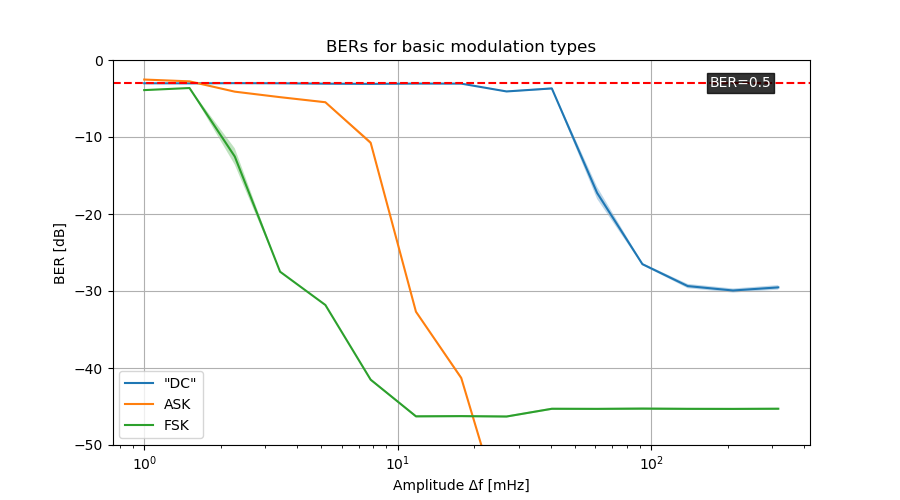

In [111]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.set_title('BERs for basic modulation types')
if data.keys() - labels.keys():
    raise ValueError(f'Unmatched simulation labels: {data.keys() - labels.keys()}')
for sim, label in labels.items():
    d = data[sim]
    ampls = np.array(sorted(list(d.keys())))
    # We've left the gnuradio BER block at its default setting, a cutoff at -70dB BER,
    # so we replace -inf with -7 here.
    filter_inf = lambda l: [ x for x in l if math.isfinite(x) ] or [-7]
    filter_nan = lambda l: [ x for x in l if math.isfinite(x) ] or [math.nan]
    bers = np.array([ statistics.mean(filter_inf(d[a][0])) for a in ampls ])
    #stdevs = [ statistics.stdev(filter_inf(d[a][0])) if len(filter_inf(d[a][0]))>1 else 0 for a in ampls ]
    stdevs = np.array([ math.sqrt(statistics.mean([x**2 for x in filter_nan(d[a][1])] + [0])) for a in ampls ])
    
    # The Gnuradio BER block calculates bit error rate over whole bytes, but we only feed in bits casted
    # to bytes. We correct for this by adding log10(8).
    # Also convert log10 values to dB.
    bers = (bers + math.log10(8))*10
    stdevs *= 10
    #ax.errorbar(ampls, bers, yerr=stdevs, label=label)
    p, = ax.plot(ampls, bers, label=label)
    
    ax.fill_between(ampls, bers-stdevs, bers+stdevs,
        alpha=0.3, facecolor=p.get_color(), linewidth=0)
ax.grid()
ax.legend()
ax.set_xscale('log')
ax.set_xlabel('Amplitude Δf [mHz]')
ax.set_ylabel('BER [dB]')
ax.set_ylim([-50, 0])
ber05 = 10*math.log10(0.5)
ax.axhline(ber05, linestyle='--', color='red')
bbox = {'facecolor': 'black', 'alpha': 0.8, 'pad': 2}
xform = mpl.transforms.blended_transform_factory(ax.transAxes, ax.transData)
ax.text(0.9, ber05, f'BER=0.5', transform=xform, color='white', bbox=bbox, ha='center', va='center')

None